# Imports

In [ ]:
import pandas as pd
import os
from rdkit import Chem
import concurrent.futures

# Read ZINC Tranches

In [ ]:
tranches_dir = 'C:/Users/Dave/Desktop/Final_Proc2/tranches_400_4'

database = pd.DataFrame()
for file in os.listdir(tranches_dir):
    df = pd.read_csv(f'{tranches_dir}/{file}', sep='\t', index_col = 'smiles')
    database = pd.concat([database,df])
database

# Define Output and Search Criteria

In [ ]:
#dictionary where keys are the output file name (excel) and values are a single SMARTS search term as a string
#if any of these SMARTS strings arent formatted correctly, search will return nothing for every type, validate elsewhere
searches_dict = {
    'type1' : '[N!R$(N(c)c)H1:1]([c:2])[c:3]',
    'type2' : '[NH!R:1]([c!$(c=O):2])[C!$(C=O)!$([CH3])!$([CH2][CH3])!$([CH]([CH3])[CH3]):3]',
    'type3' : '[NH0]([c:2])([c:3])[c:4]',
    'type4' : '[NRH0:1](@[cR2:2])(@[*R:3])[cR:4]',
    'type5' : '[N!R!$(NC=O):1]([C!$(C=O)!$([CH3])!$([CH2][CH3])!$([CH]([CH3])[CH3]):2])([C!$(C=O)!$([CH3])!$([CH2][CH3])!$([CH]([CH3])[CH3]):3])[c!$(cc=[O])!$(cnc=[O]):4]',
    #'type6' : '[NH:1]([c!$(c=O):2])[C$(c=O):3]',
    #'type7' : '[NH0]([c!$(c=O):2])([C$(c=O):3])[C!$(c=O):3]',
}

#compile the strings to objects
for key in searches_dict.keys():
    searches_dict[key] = Chem.MolFromSmarts(searches_dict[key])
    
#initialize output data structure
output_dict = {}
for key in searches_dict.keys():
    output_dict[key] = []

# Run Search

In [ ]:
#need to generate mol file, find matches, and add to dictionary once per thread to avoid running out of memory
def get_matches(smiles):
    mol = Chem.MolFromSmiles(smiles)
    for key in searches_dict.keys():
        if mol.HasSubstructMatch(searches_dict[key]):
            output_dict[key].append(smiles)

with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(get_matches, database.index.values.tolist())

for key in output_dict.keys():
    print(f'Found {len(output_dict[key])} matches for subset {key}')

# Export Subsets as CSV Files

In [ ]:
for key in searches_dict.keys():
    df = pd.DataFrame()
    df = database.loc[[index for index in output_dict[key]]]
    df.to_csv(f'{key}.csv')

# SMARTS Visualization

## type1:
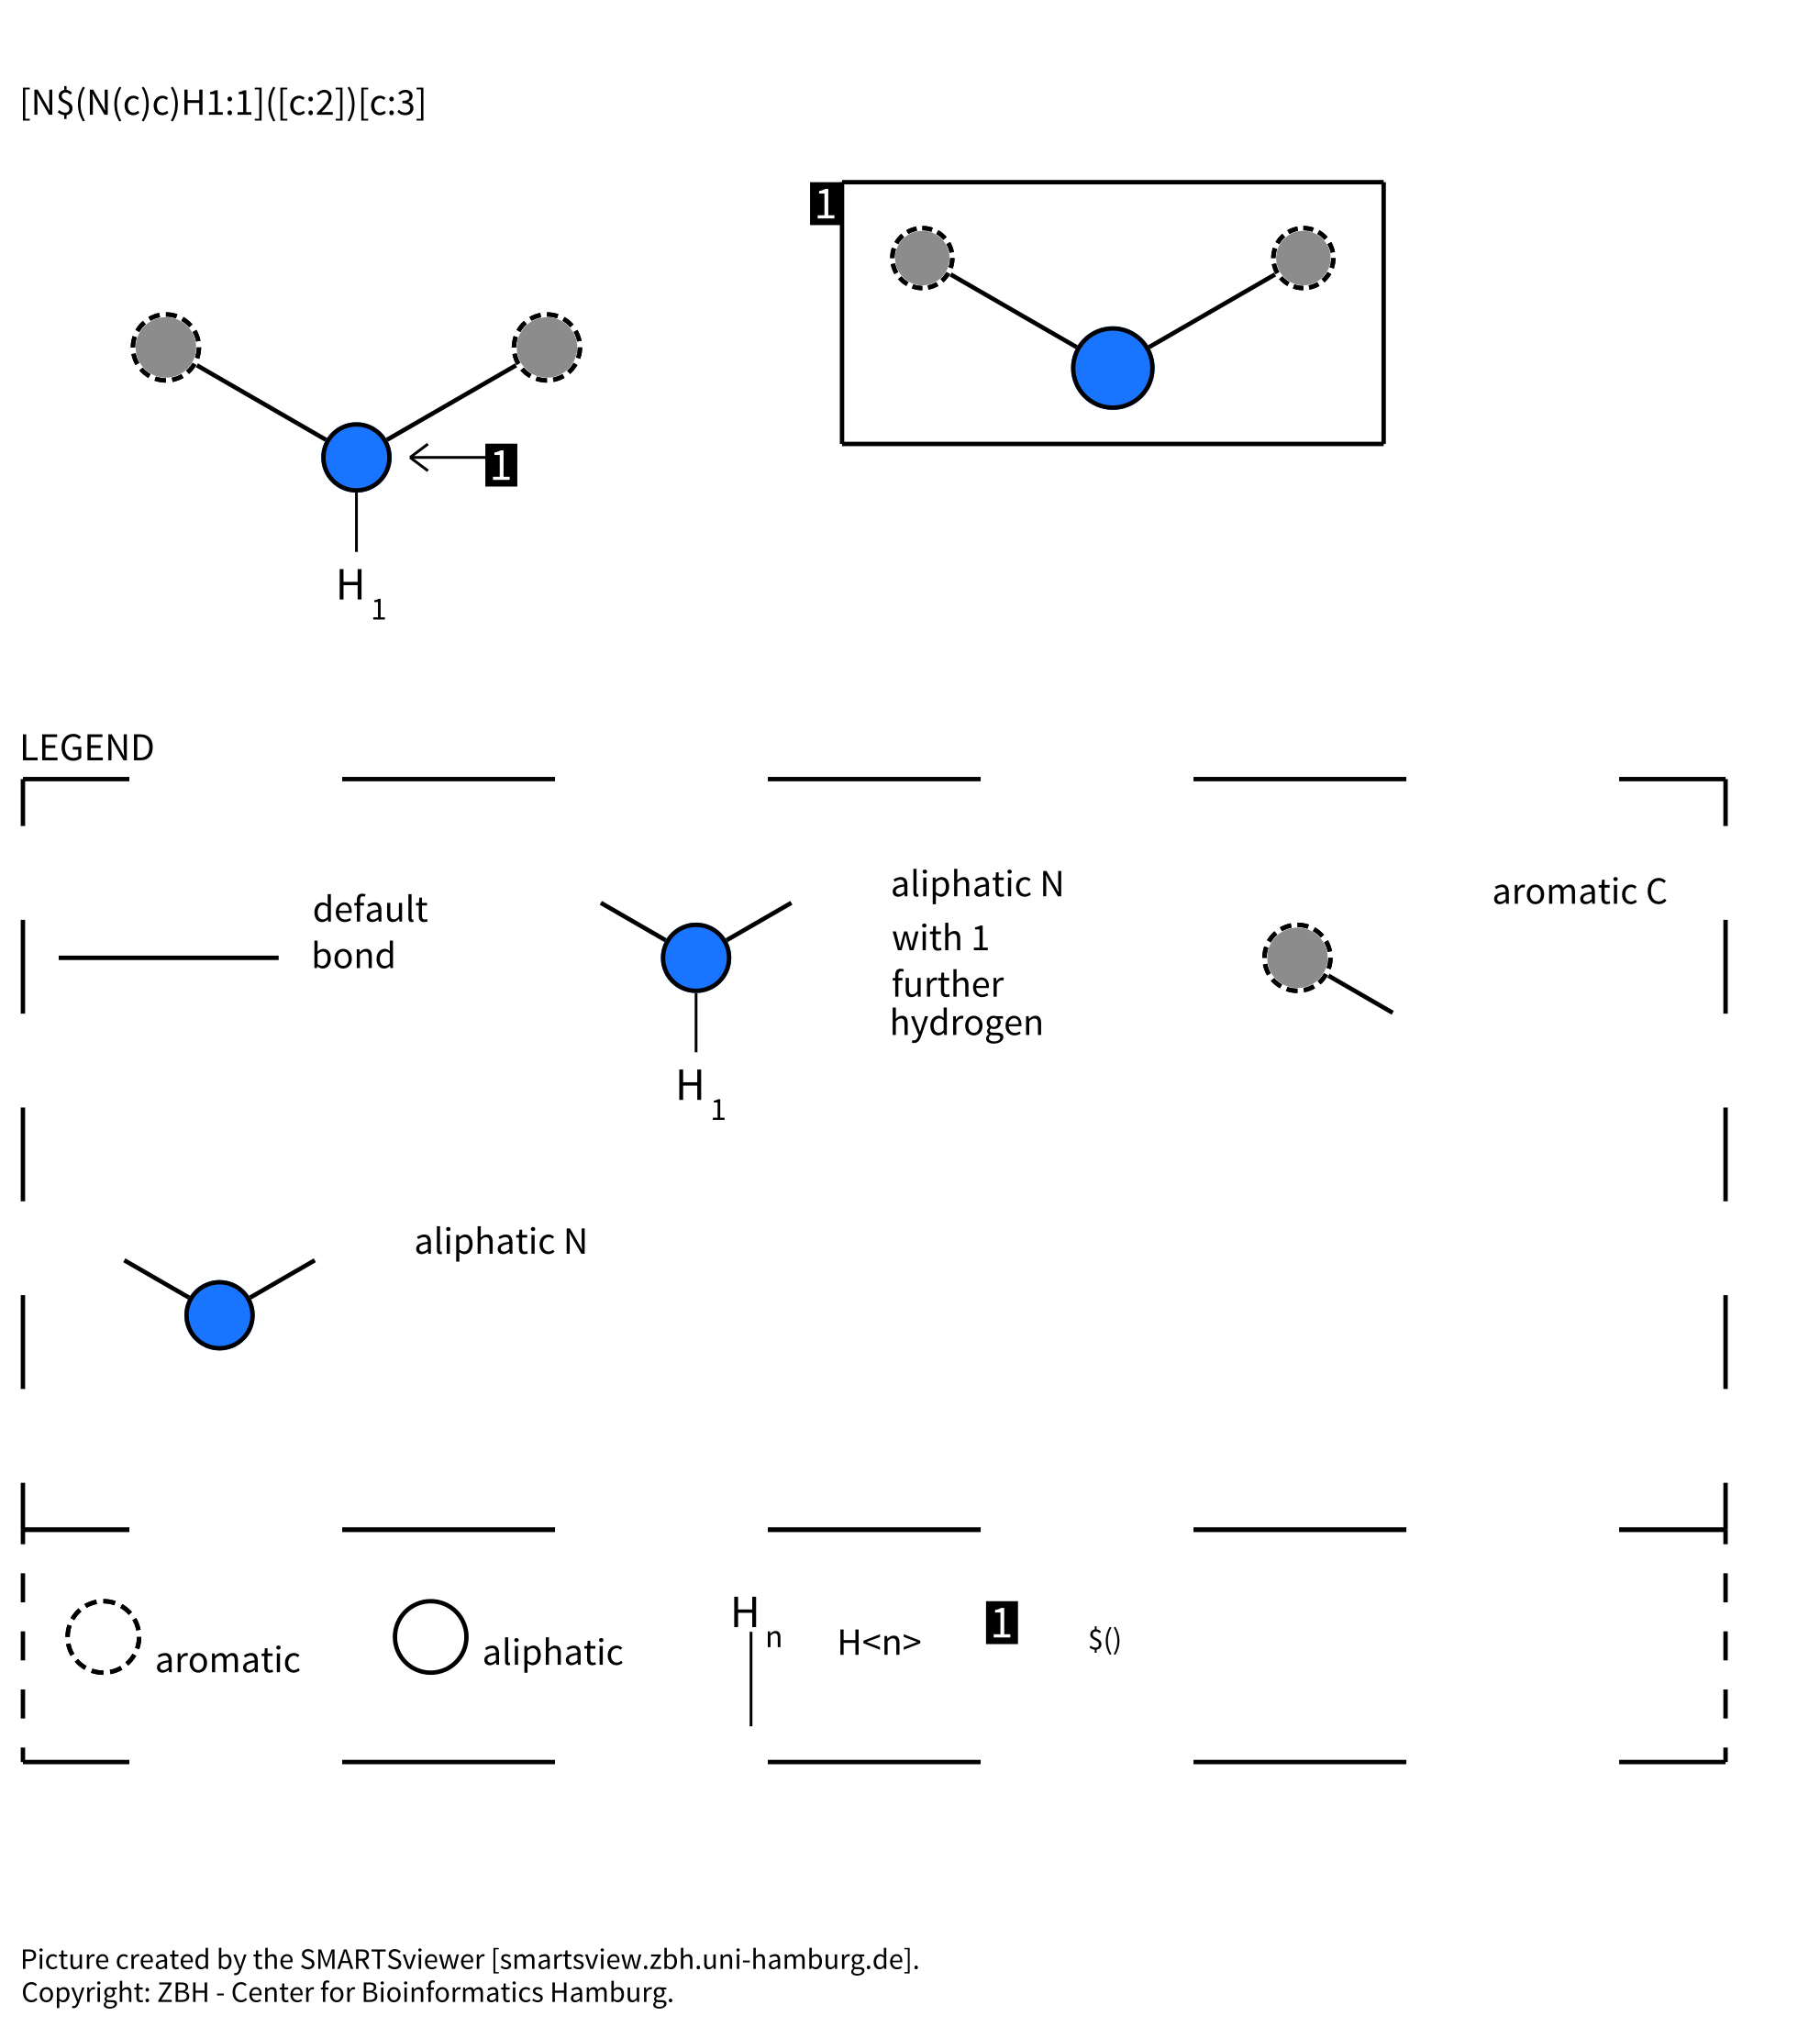
## type2:
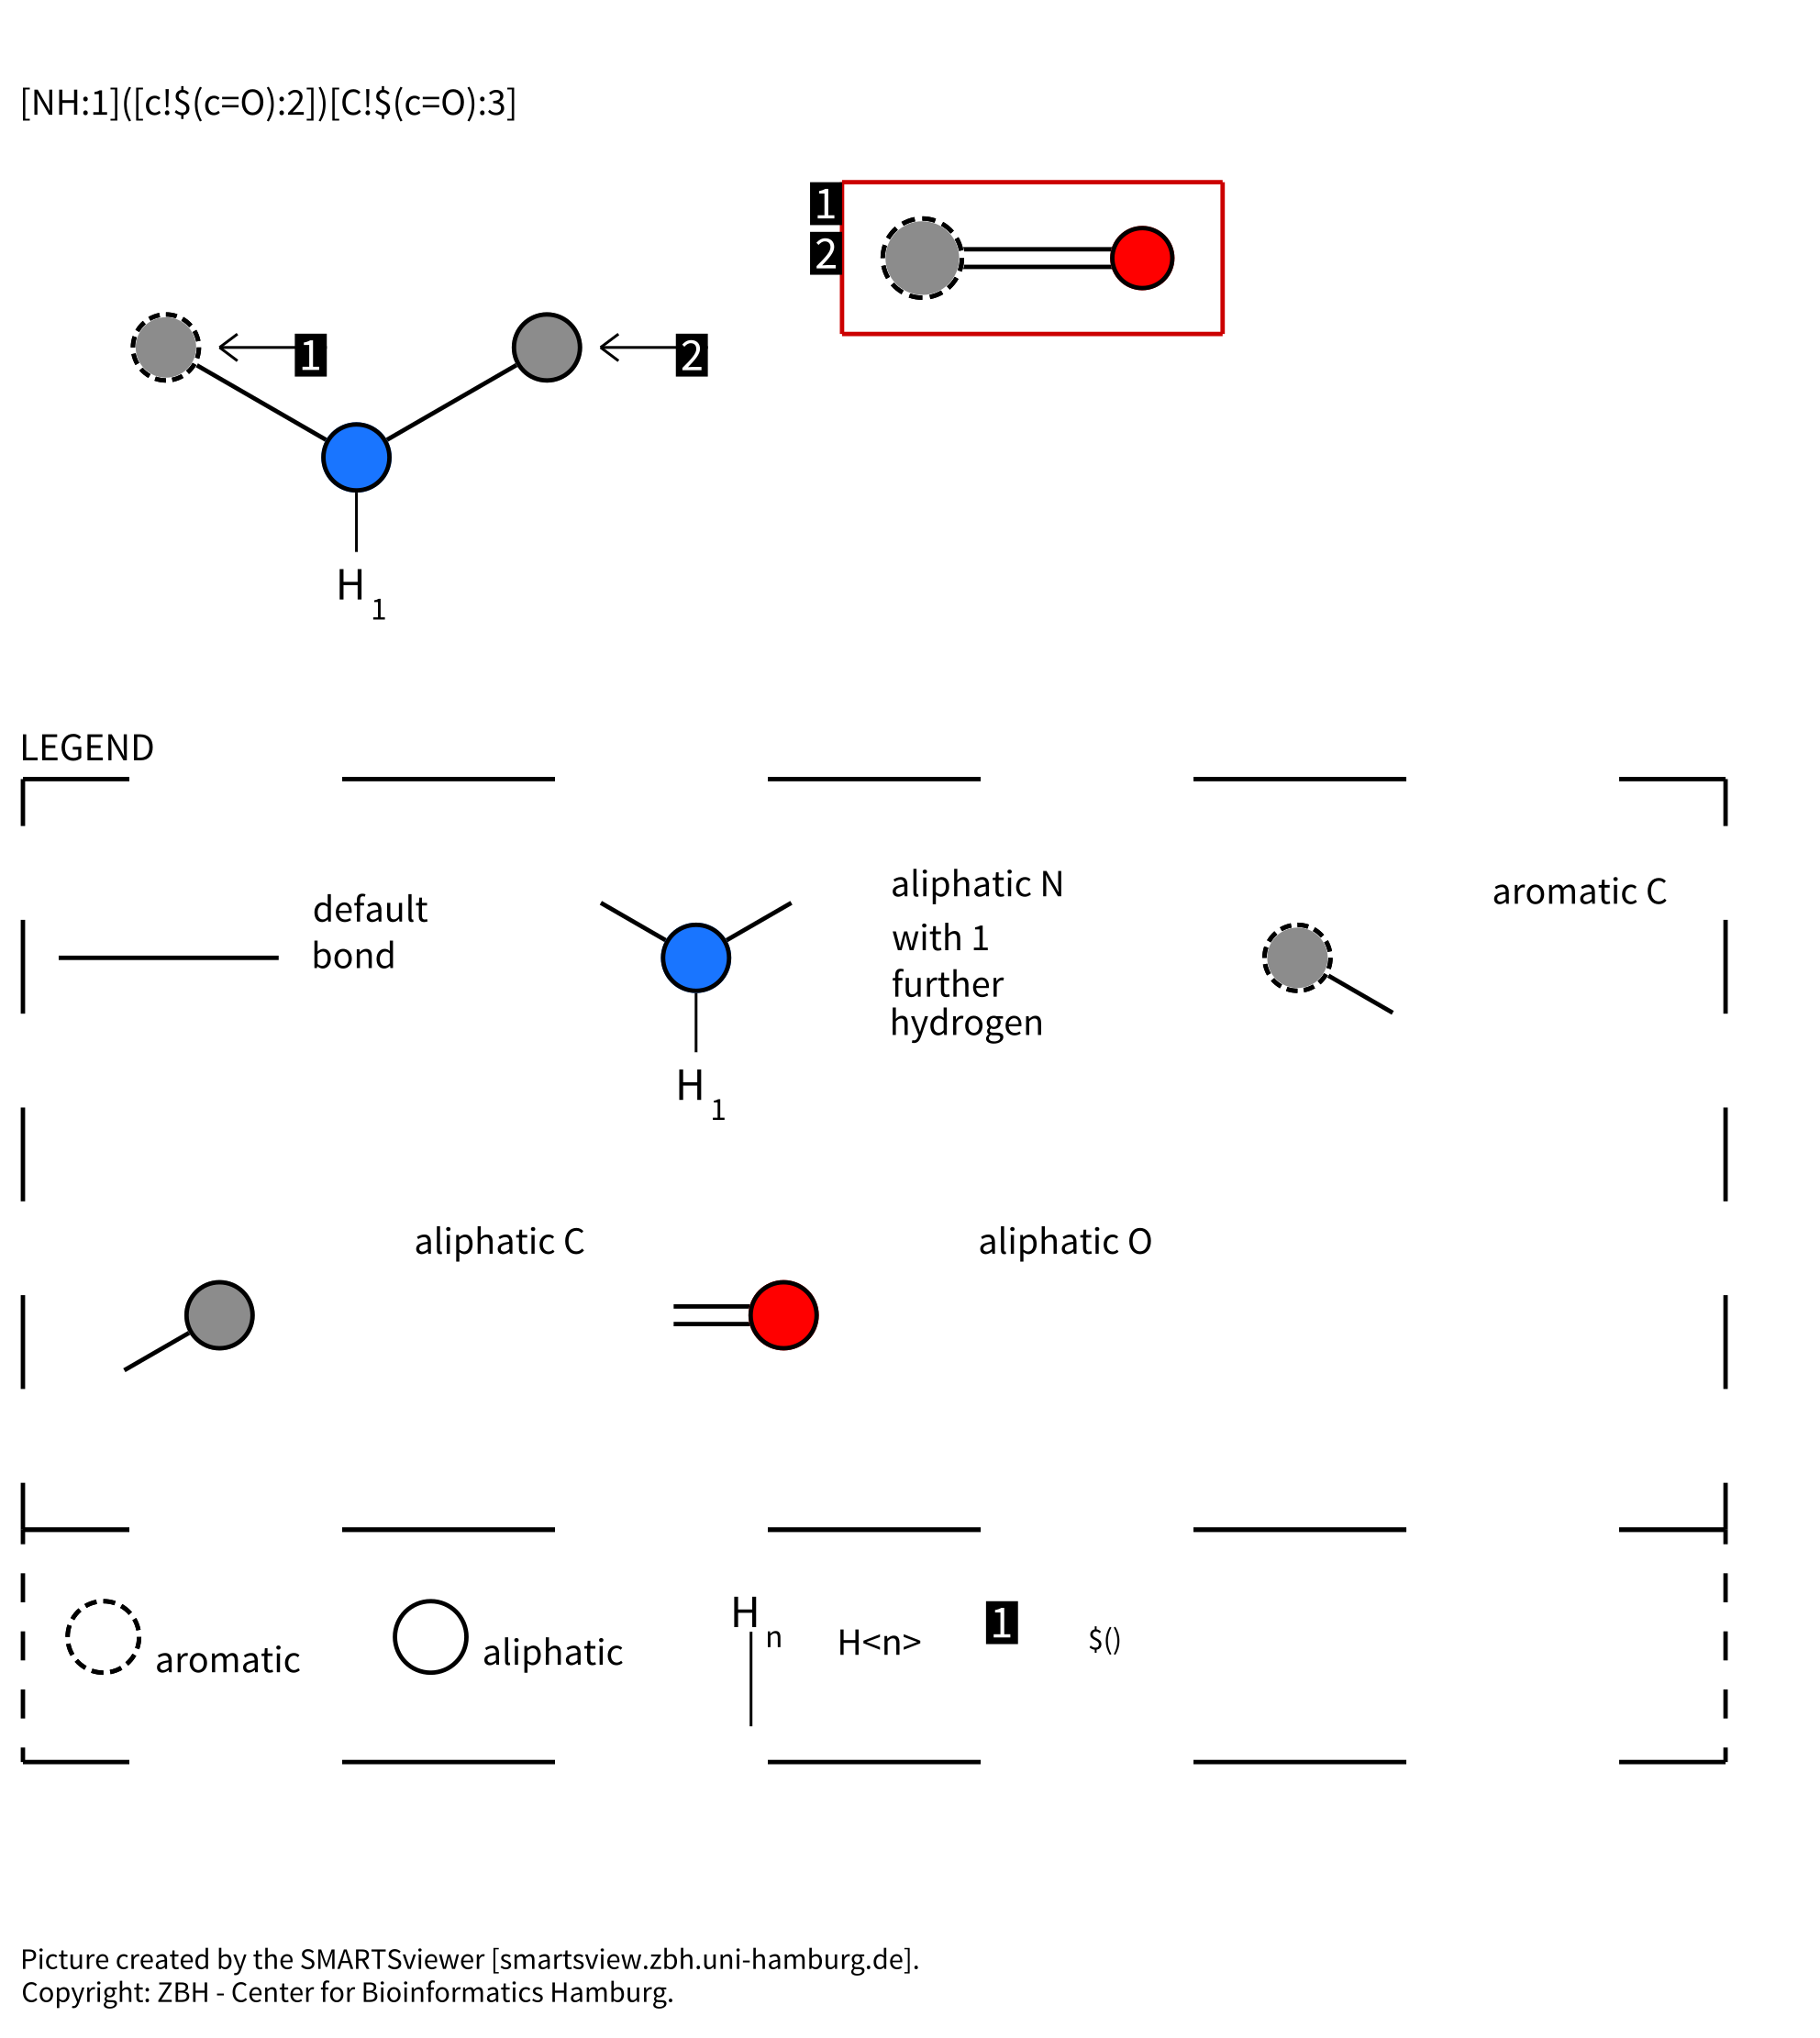
## type3:
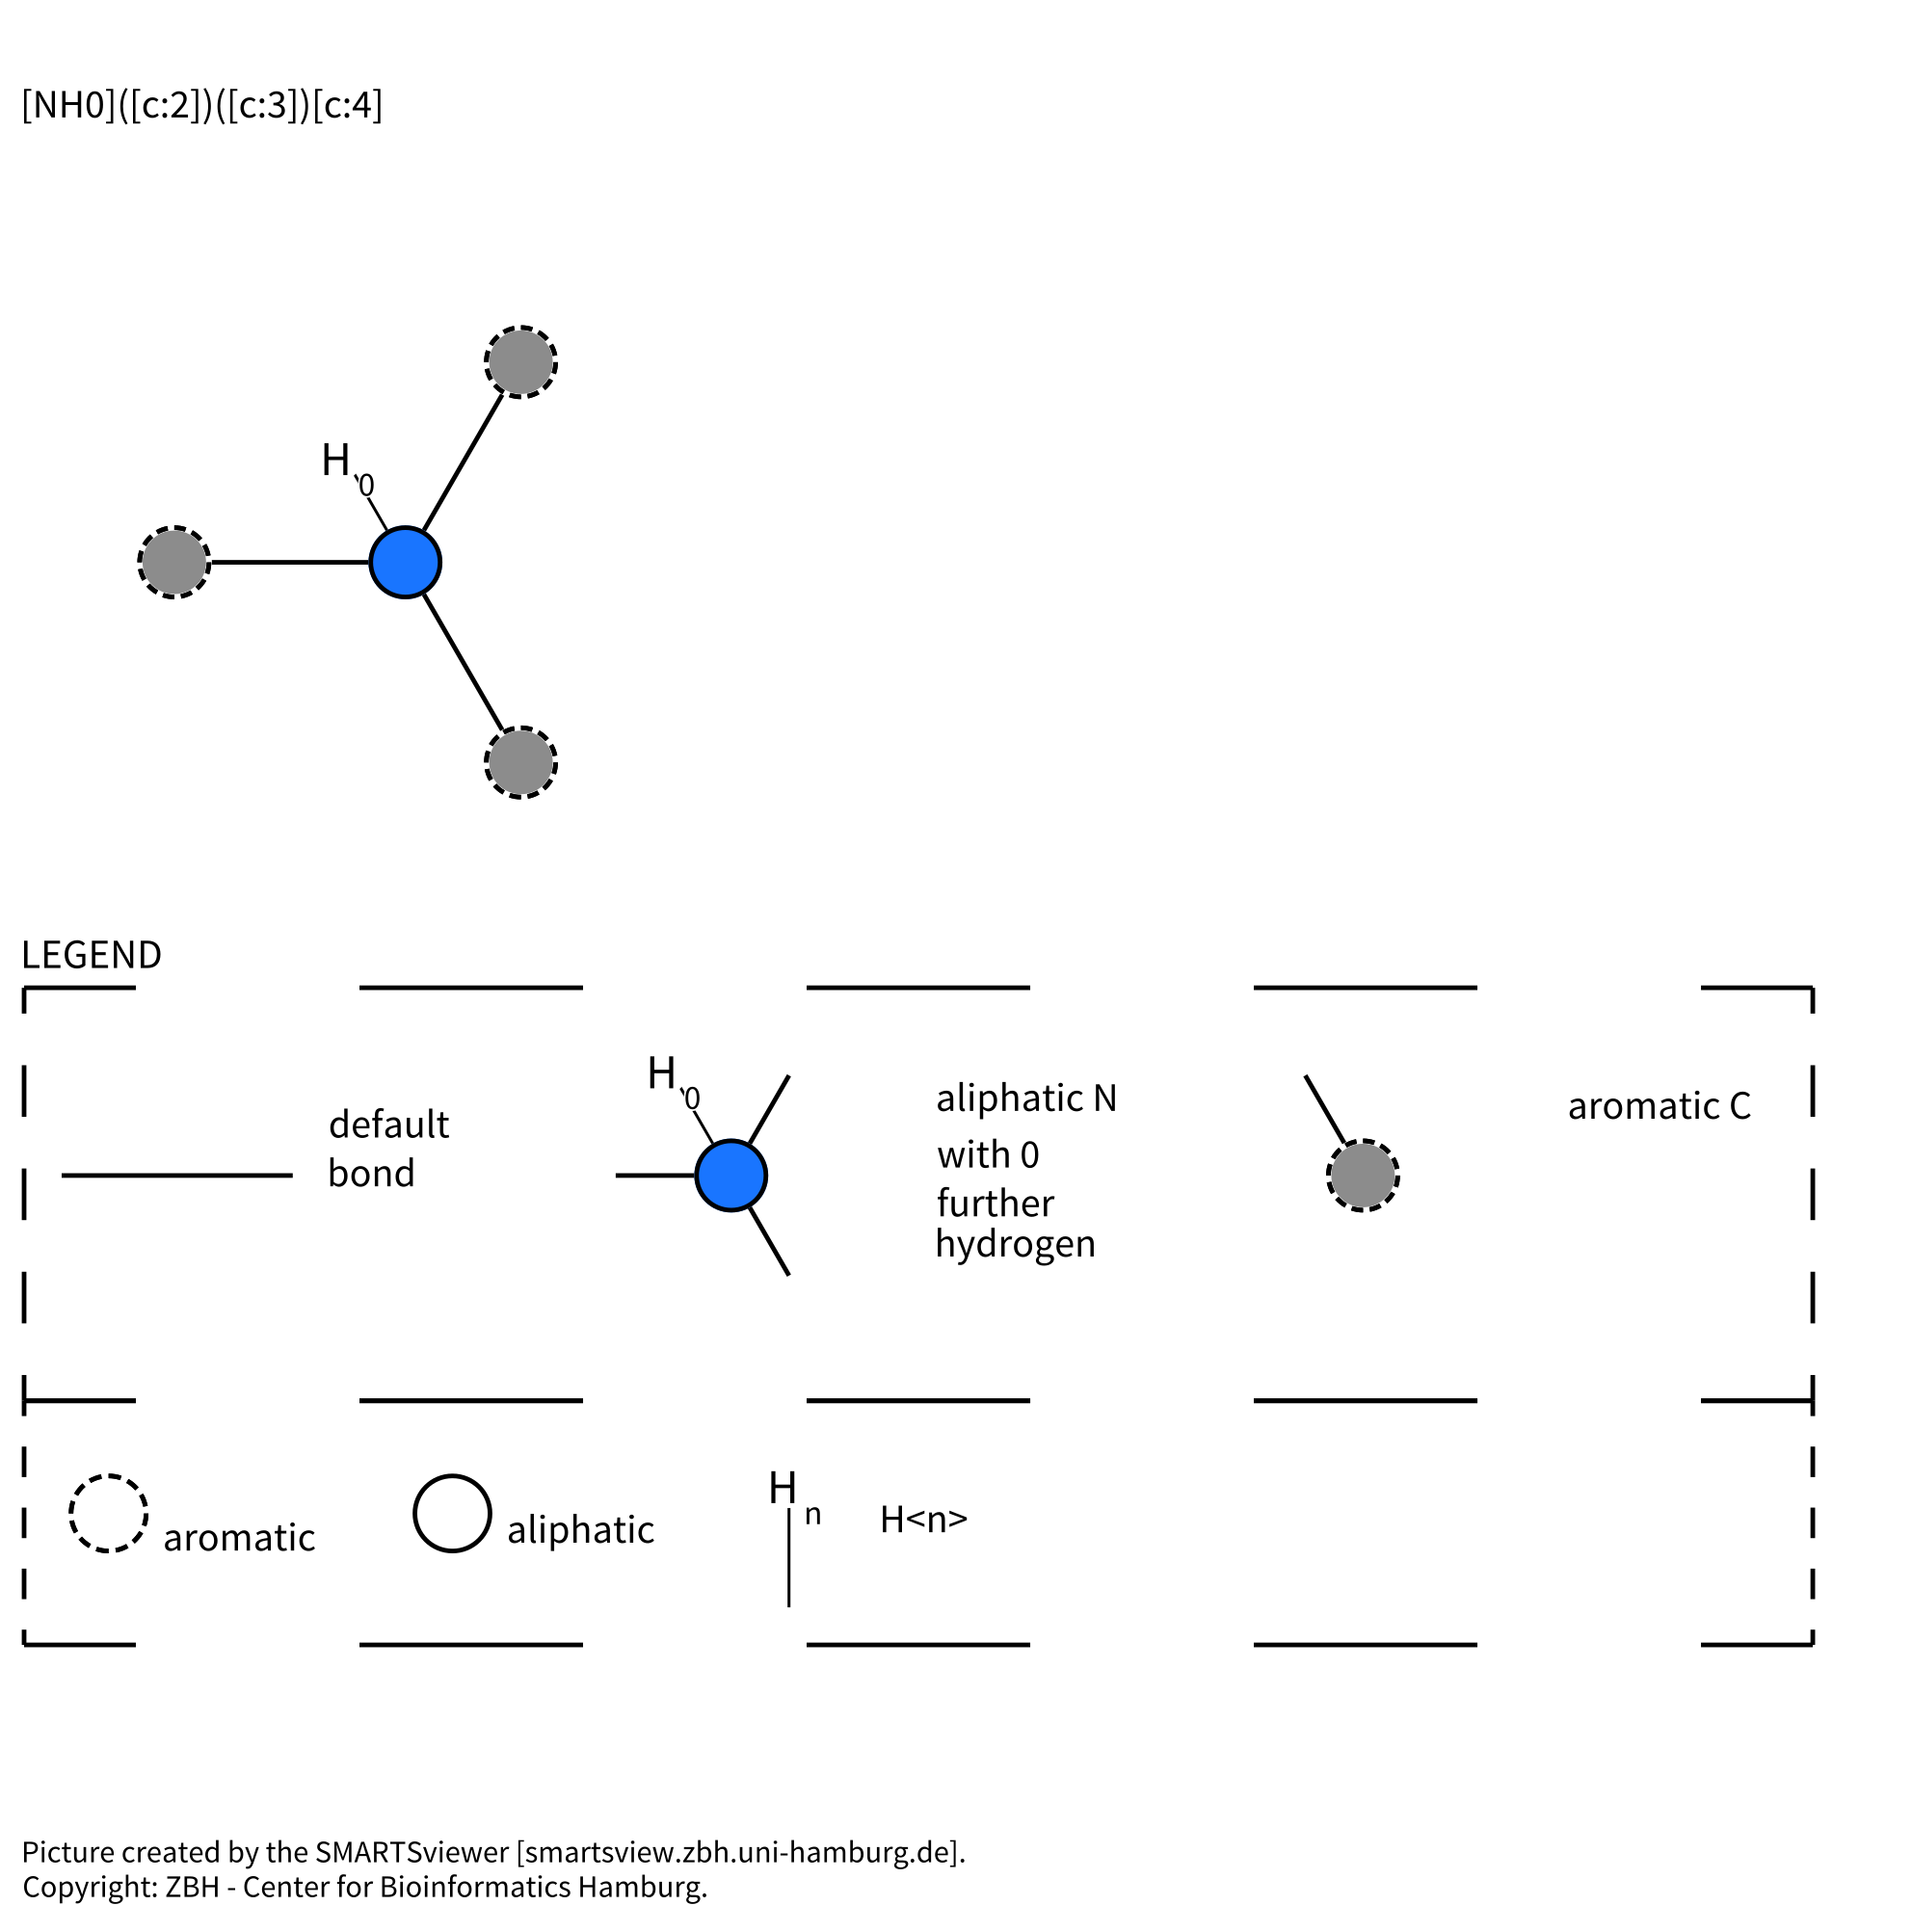
## type4:
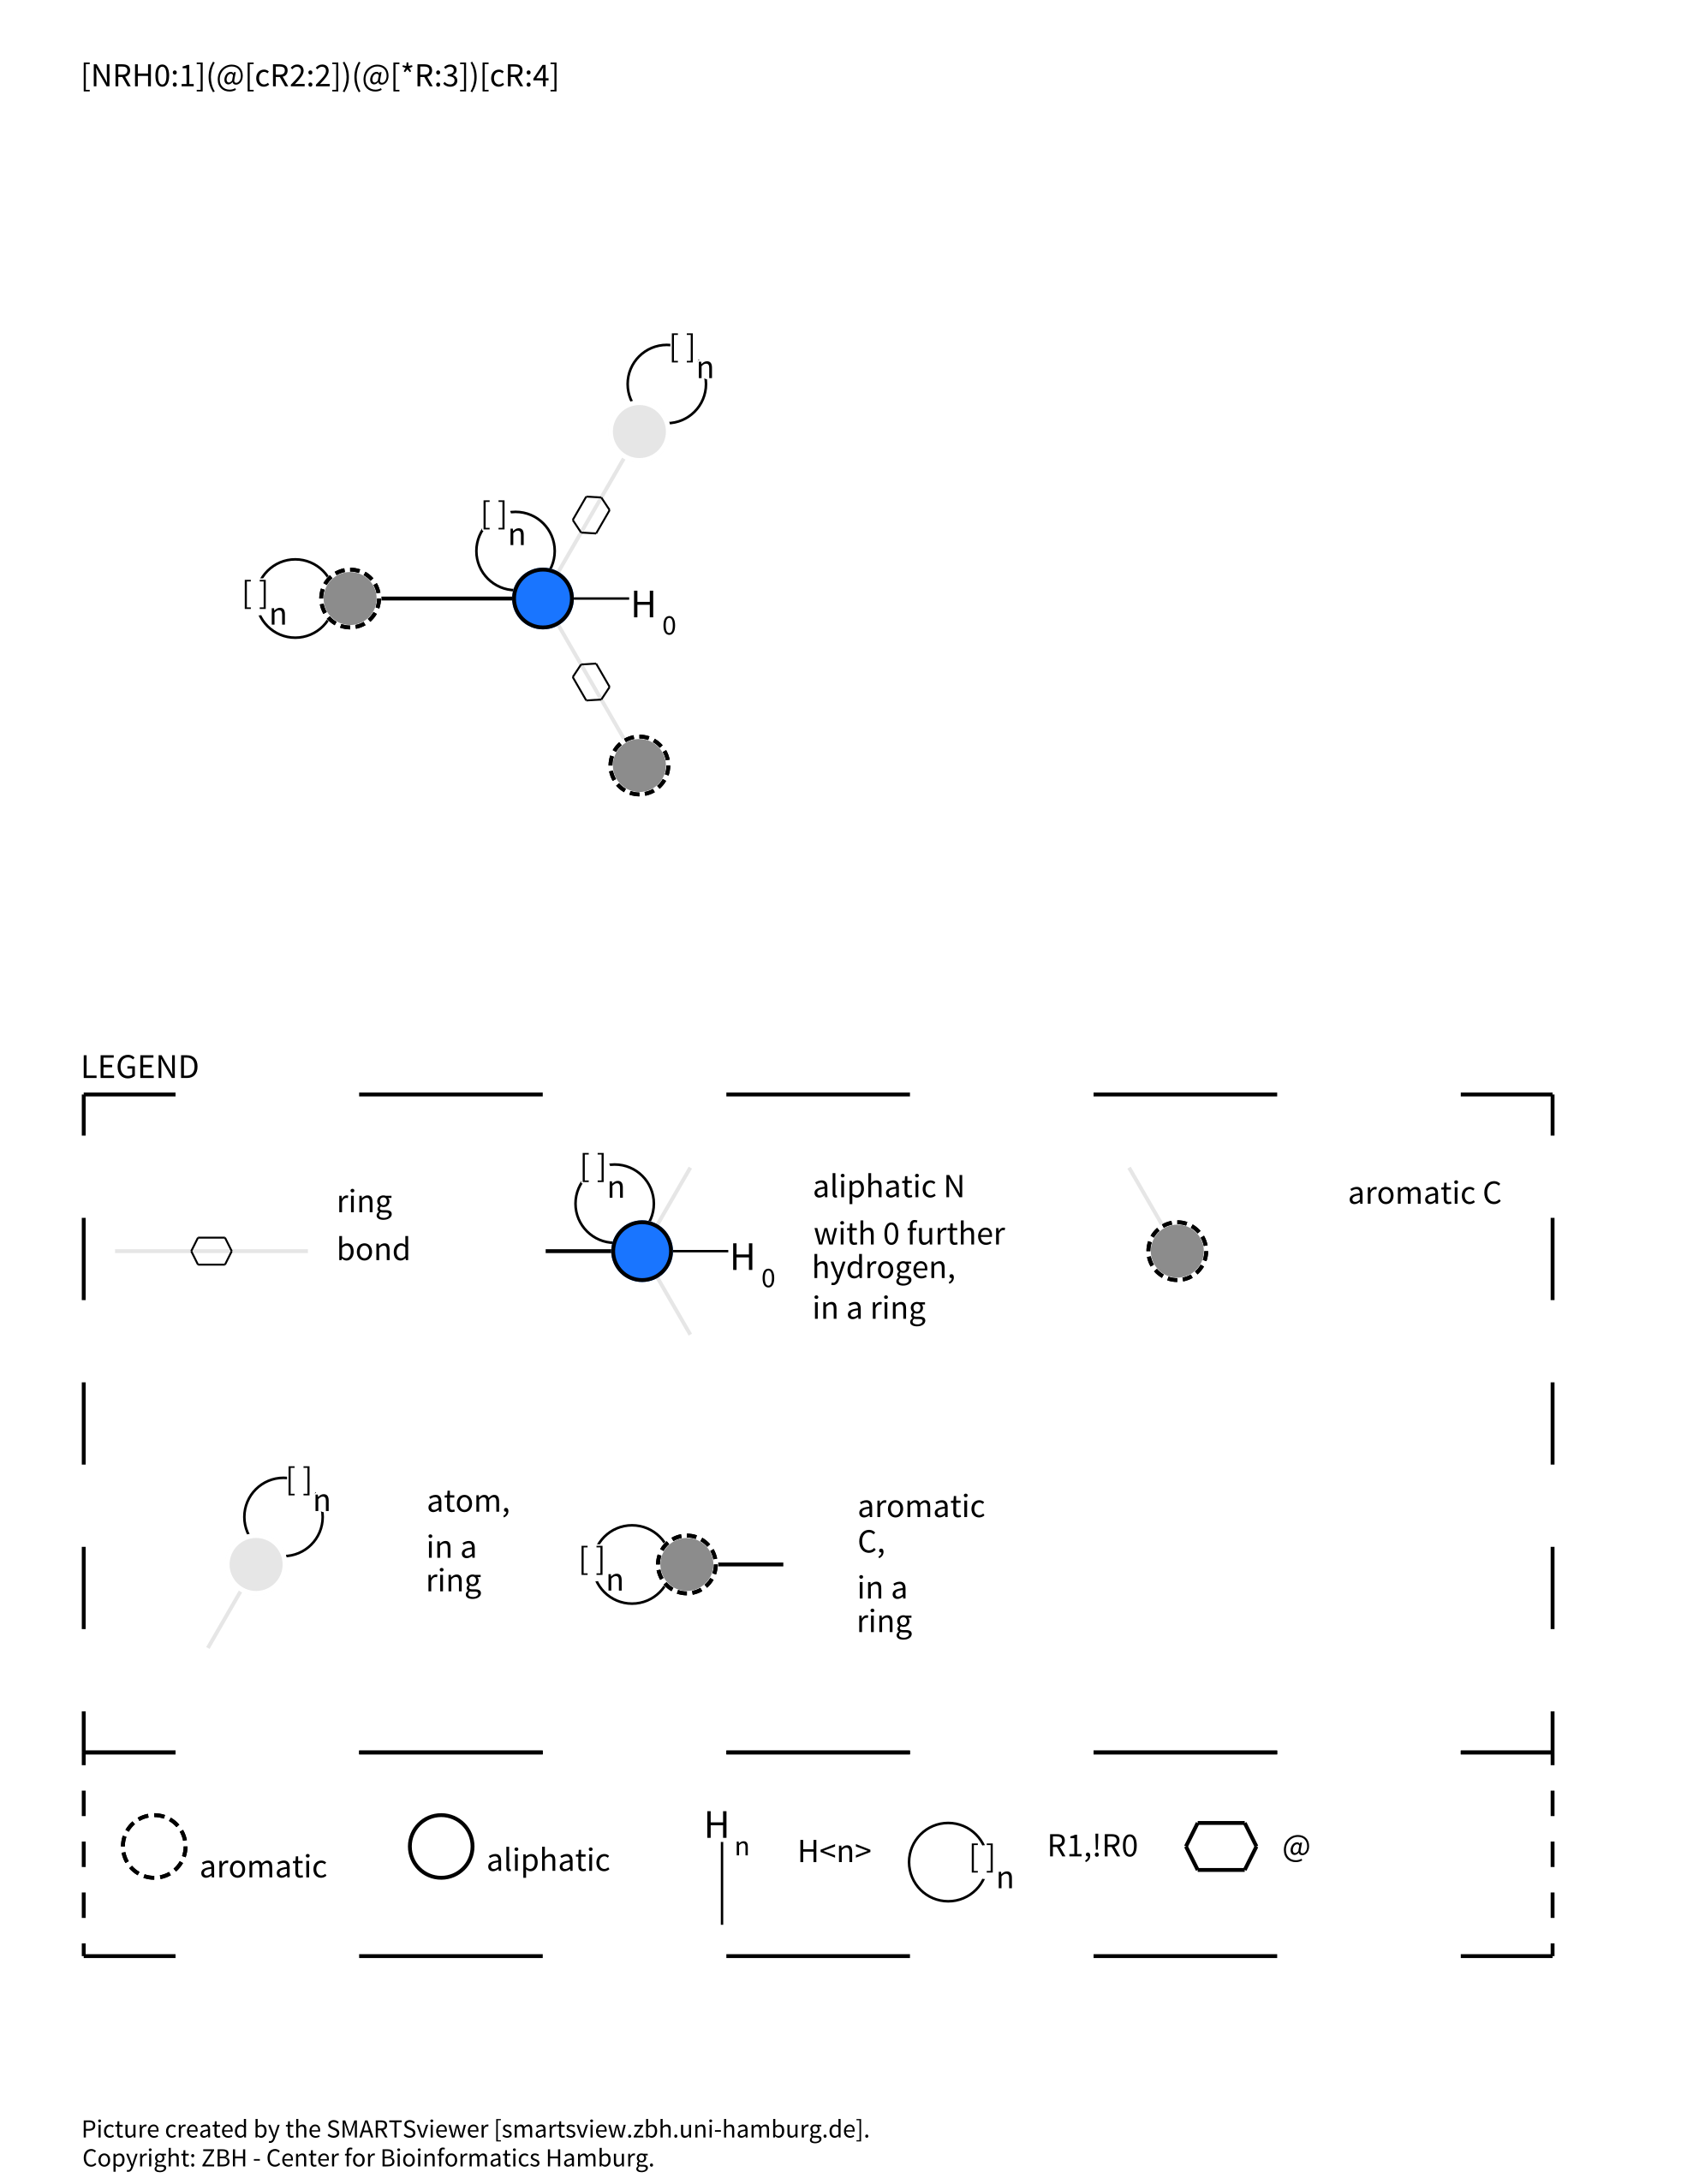
## type5:
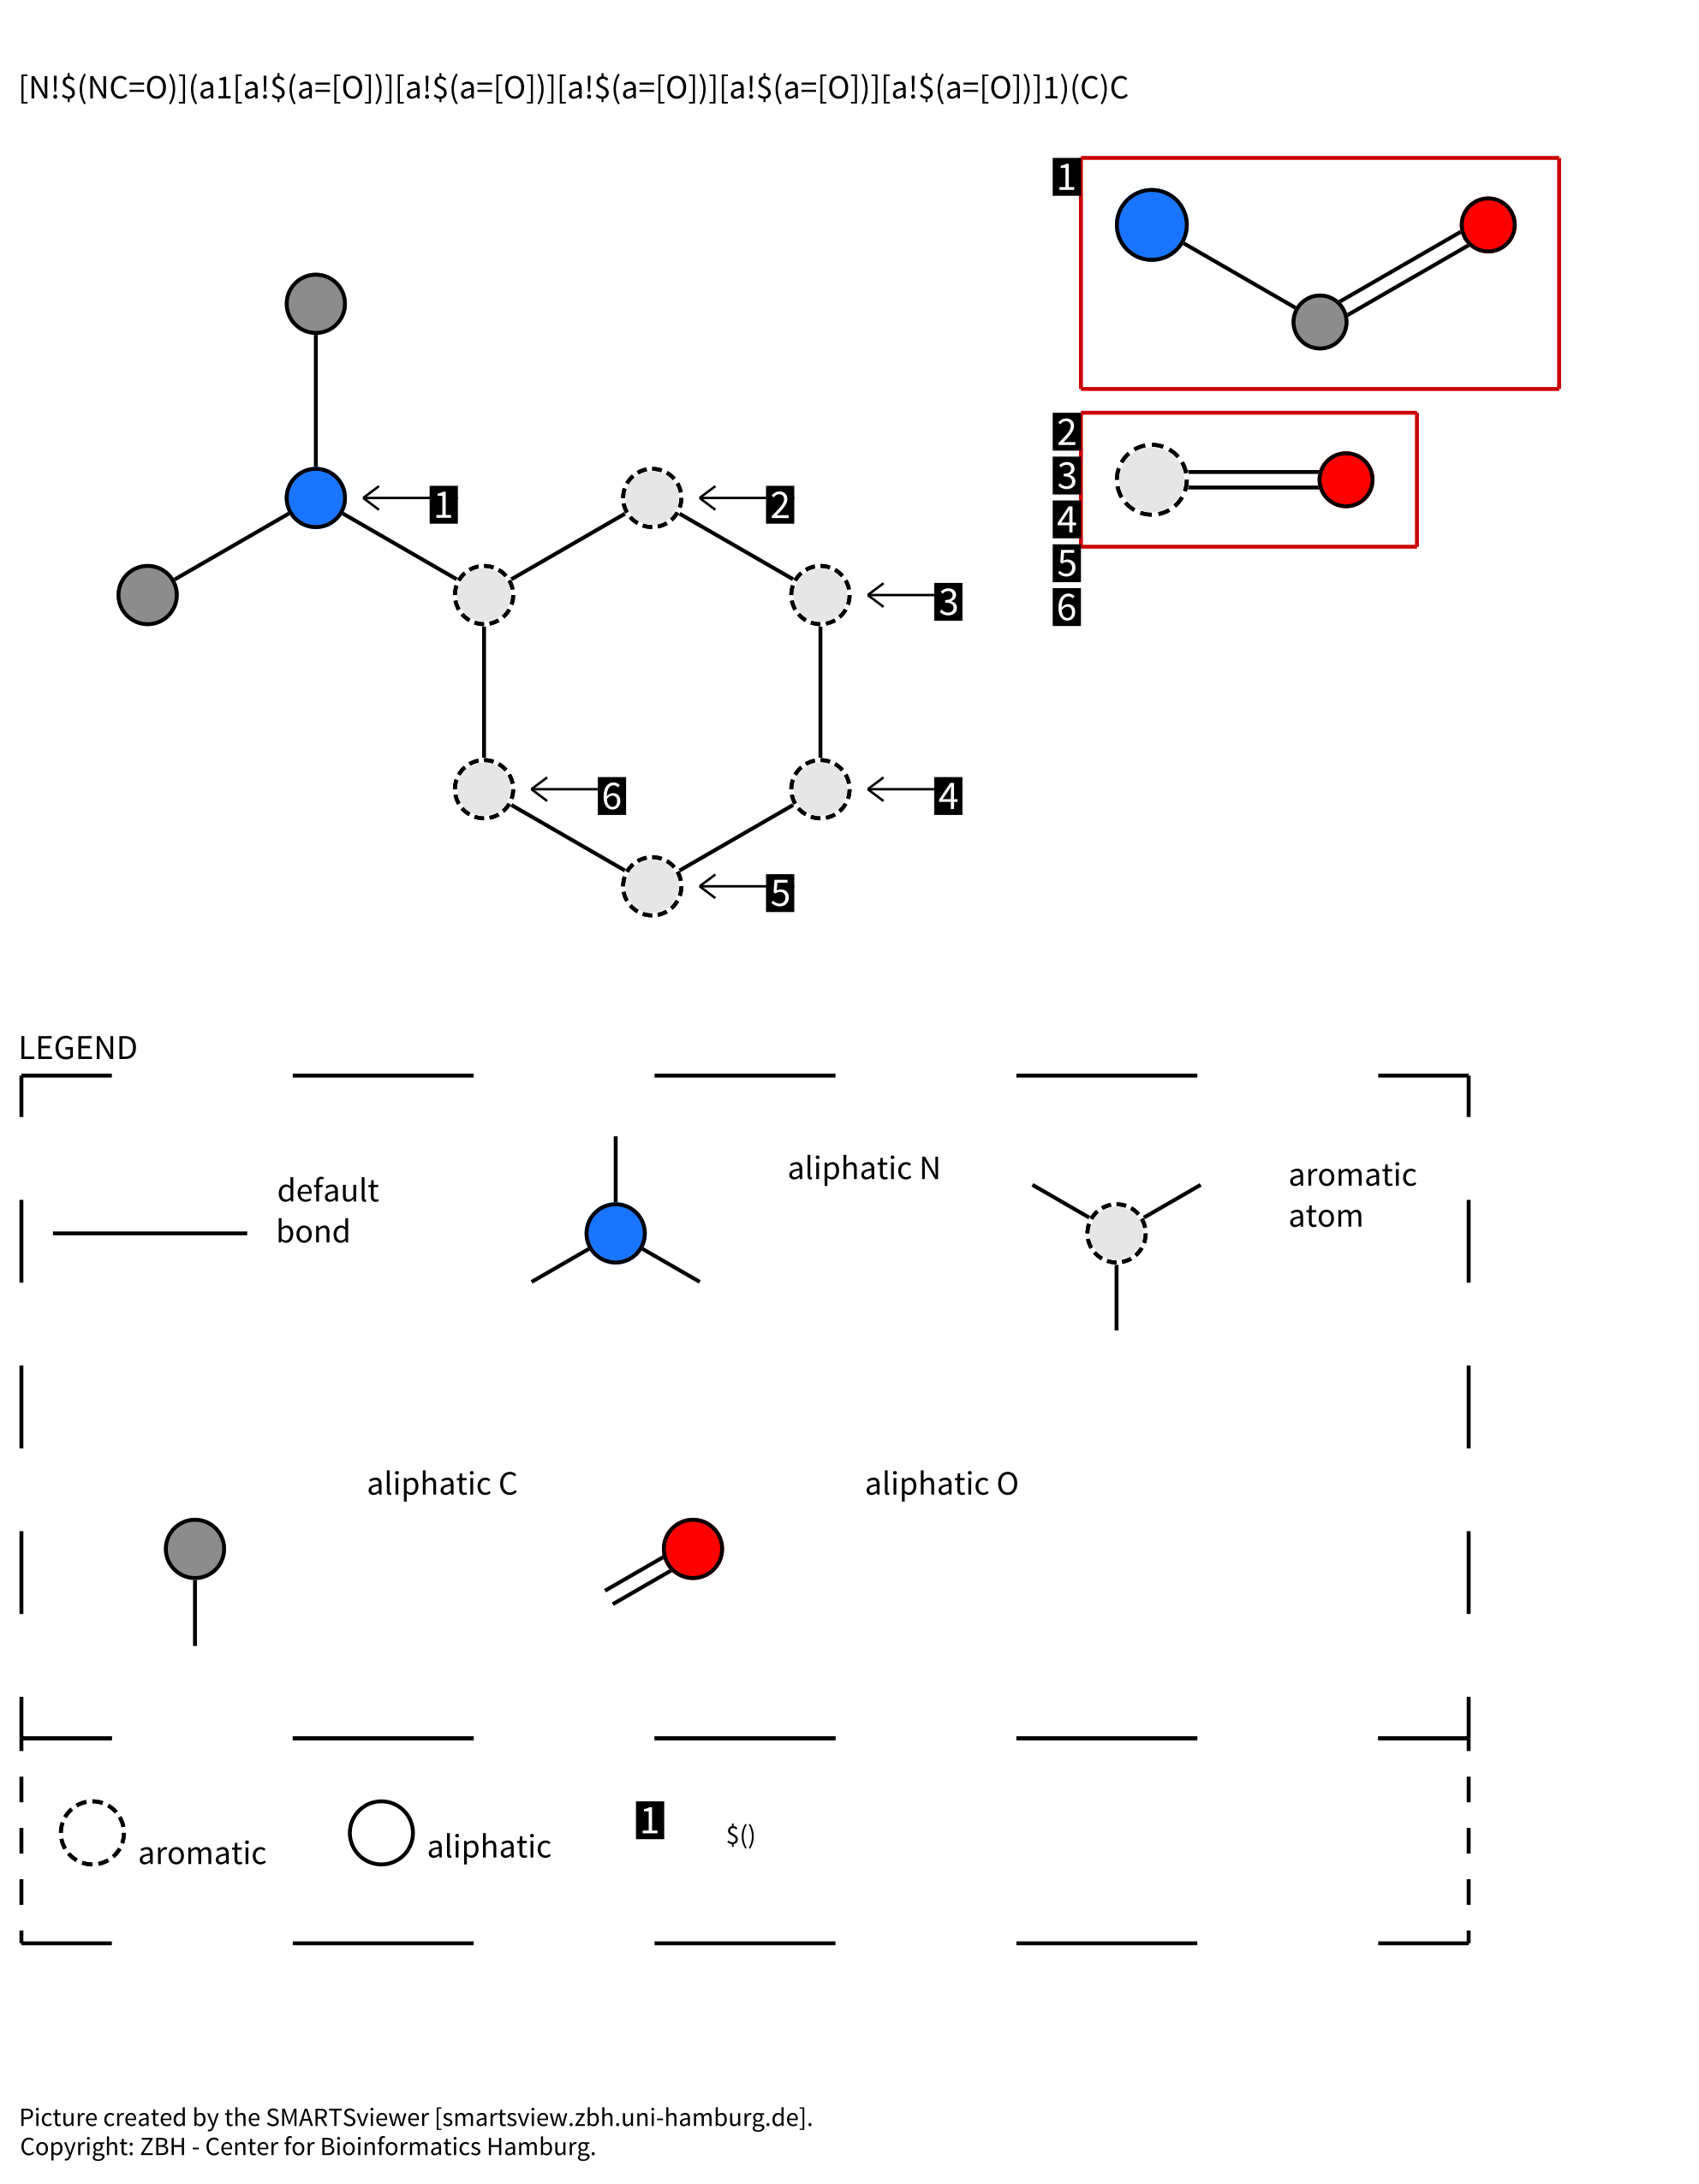
## type6:
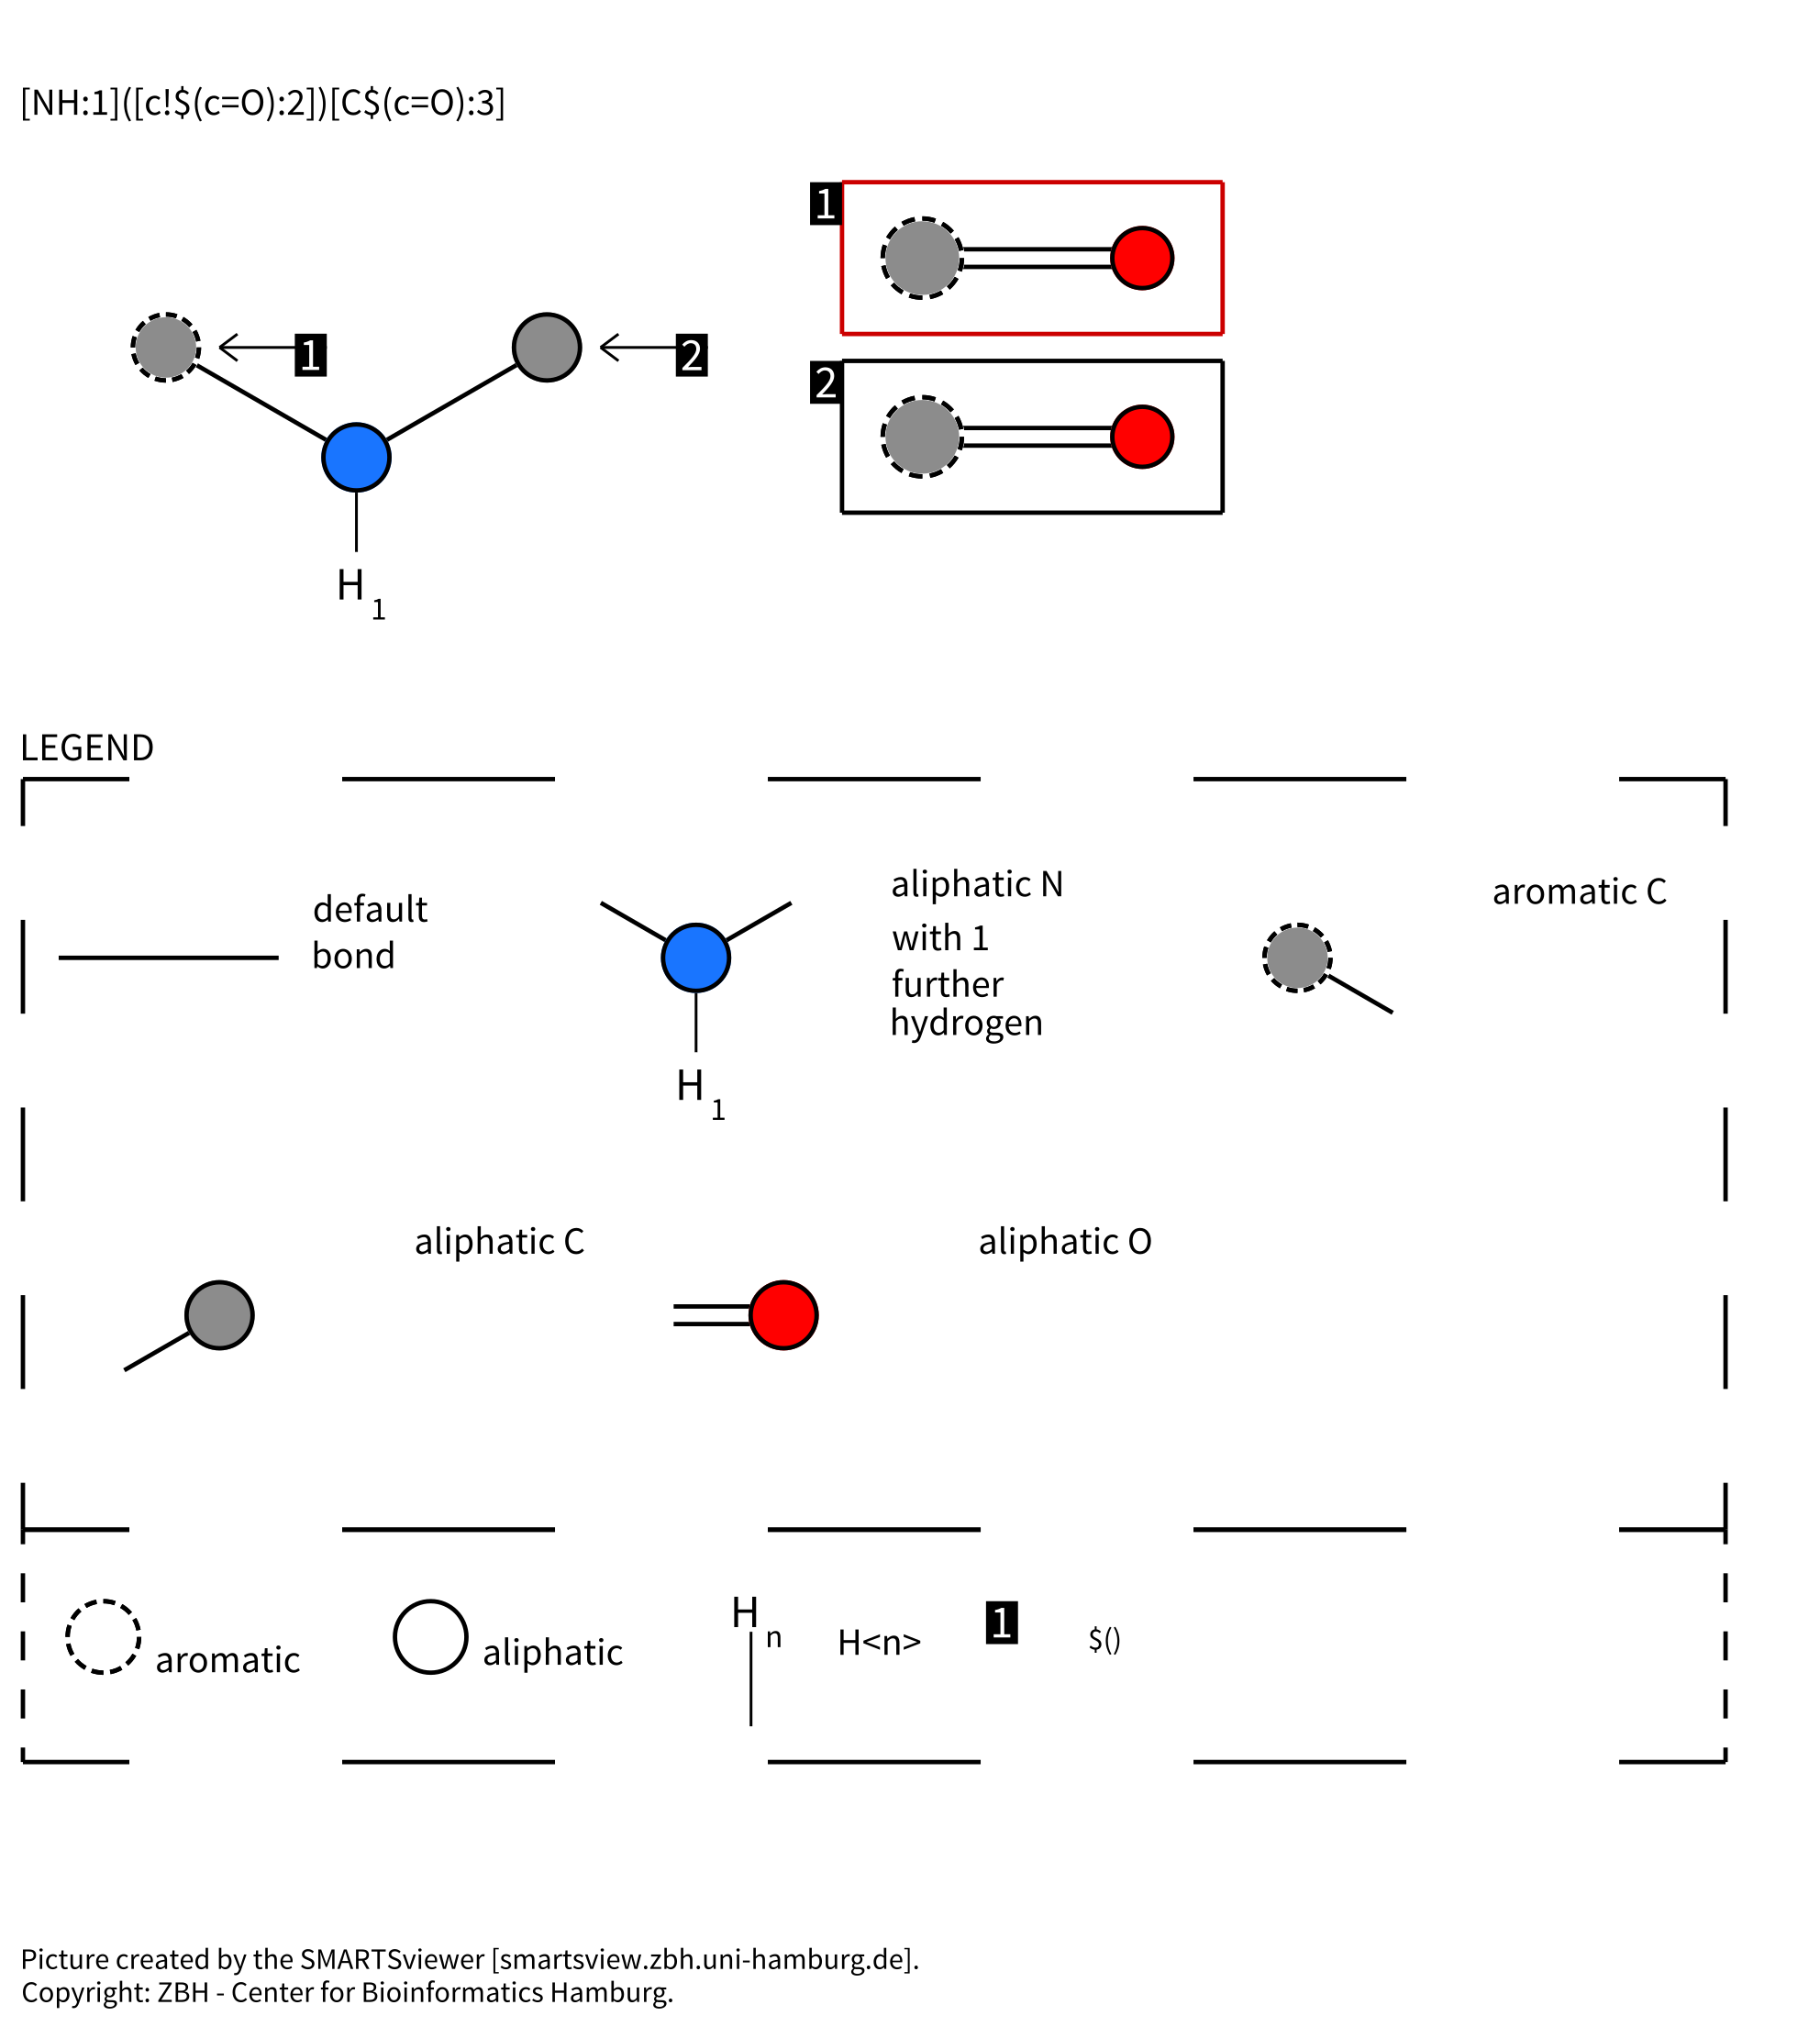
## type7:
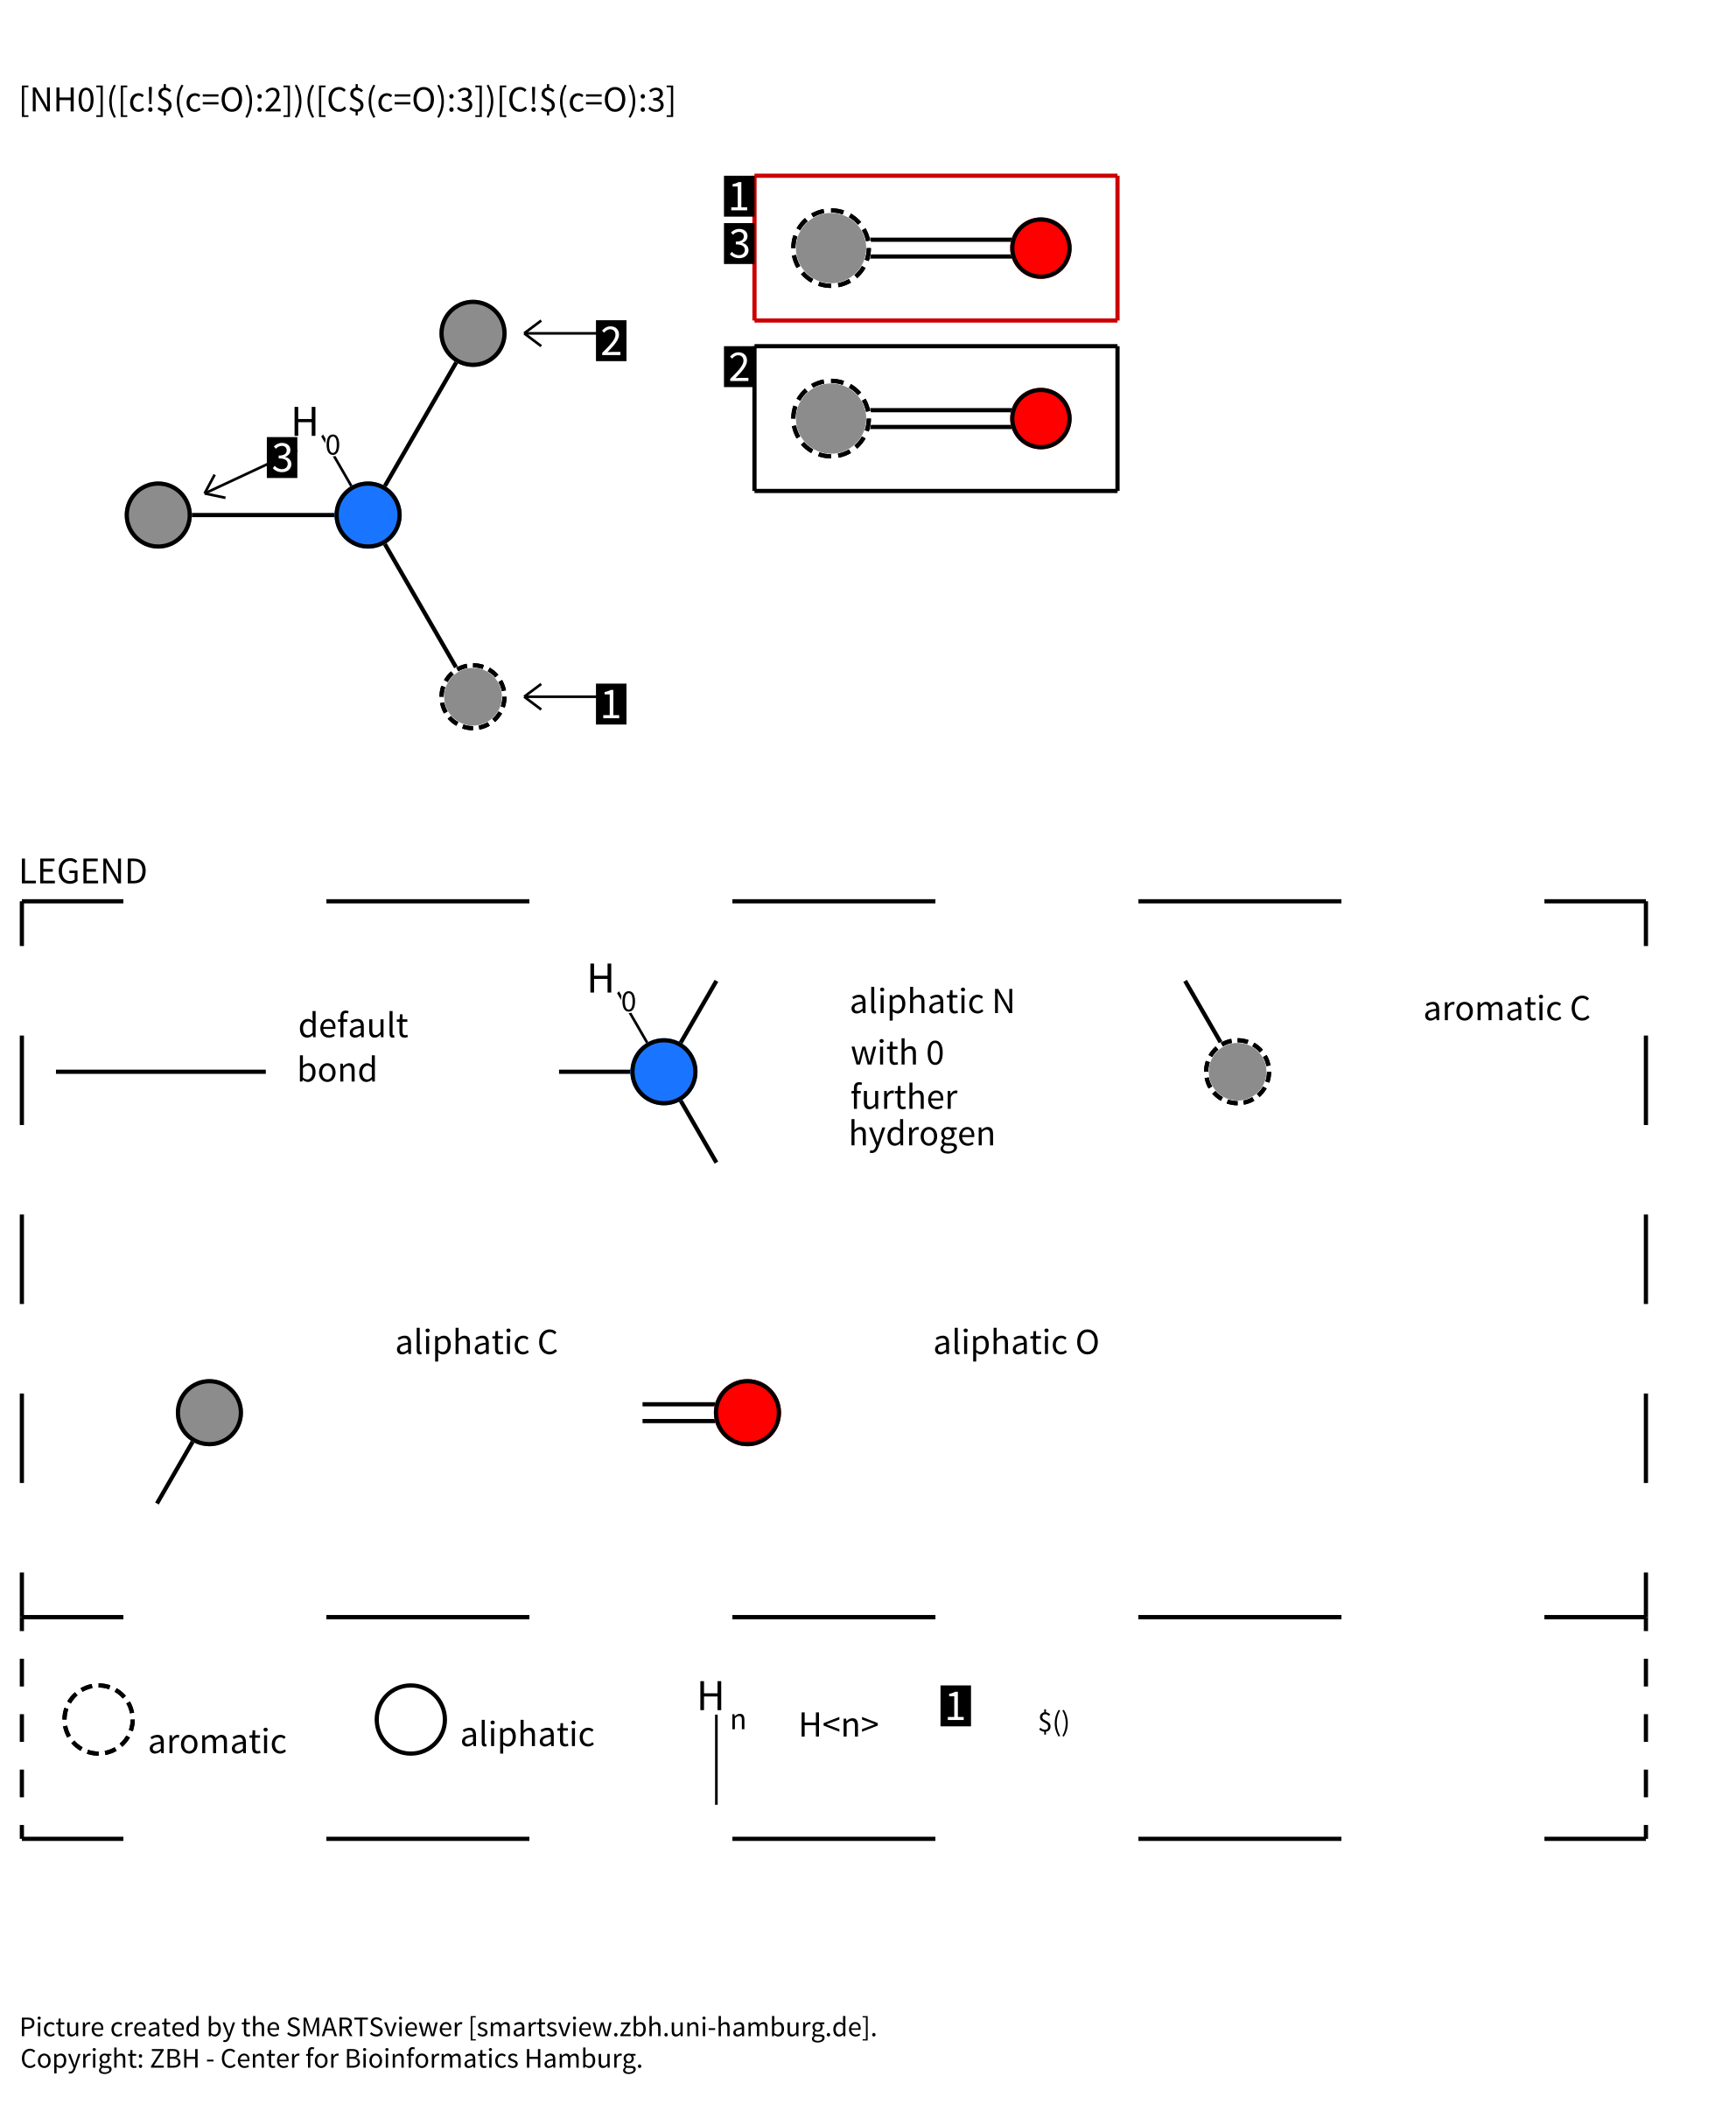